In [1]:
from customtree import *
from customtreeplot import *

In [2]:
A = [4, 7, 8]
gen_tree = gen_fldr_tree
plot_toll_2_crosshair = False
toll_cutoff=lambda *args:False

fldr_tree = gen_fldr_tree(A)
depth_min = tree_depth(fldr_tree)
ky_tree = gen_ky_tree(A)
depth_max = tree_depth(ky_tree)
HA = H(A)
tree_tolls = [get_tree_entropy(fldr_tree) - HA]
depth_range = [depth_min]
ky_toll = get_tree_entropy(ky_tree) - HA
for depth in range(depth_min, depth_max+1):
    toll = get_tree_entropy(gen_tree(A, depth)) - HA
    tree_tolls.append(toll)
    depth_range.append(depth)
    if toll_cutoff(toll, ky_toll, depth_min, depth, depth_max):
        break

tree_tolls.append(ky_toll)
depth_range.append(depth_max)

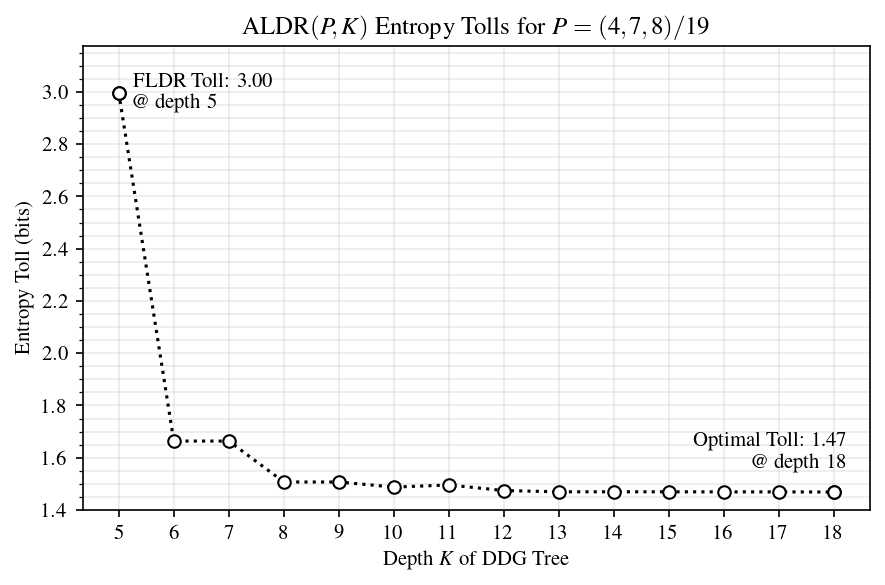

In [3]:
fig, ax = plt.subplots(figsize=(5,4), tight_layout=True, dpi=150)

method = 'ALDR'
A_str = str(A).replace('[','(').replace(']',')')
ax.set_title(r'$\textrm{ALDR}(P,K)$ Entropy Tolls ' + (r'for $P=%s/%d$' % (A_str, sum(A)) if len(A) <= 10 else ''))
# plot the data, both discretely and with connecting lines
ax.plot(depth_range, tree_tolls, color='k', linestyle=':', marker='o', markerfacecolor='white', markeredgecolor='k')

# ax.axvline(depth_min, linestyle='--', color='k')
# ax.axhline(tree_tolls[-1], linestyle='--', color='k')
# ax.axhline(tree_tolls[0], linestyle='--', color='k')

ax.text(depth_max+0.25, 1.05*tree_tolls[-1], f'Optimal Toll: {tree_tolls[-1]:.2f}\n@ depth {depth_max}', va='bottom', ha='right')
ax.text(depth_min+0.25, tree_tolls[0], f'FLDR Toll: {tree_tolls[0]:.2f}\n@ depth {depth_min}', va='center', ha='left')

# x-axis is the depth of the tree
ax.set_xlabel(r'Depth $K$ of DDG Tree')
ax.set_ylabel('Entropy Toll (bits)')

ax.set_ylim([1.4, 3.175])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.grid(which='both', alpha=0.25)

fig.set_size_inches(6, 4)
fig.set_tight_layout(True)
fig.savefig(output_dir / 'aldr-tree-tolls-478.png')